In [40]:
from sonarqube_toolkit import SonarQubeRestClient
import configparser
import plotly.express as px
import pandas as pd
from math import pi

In [41]:
    sonarClient = SonarQubeRestClient('../config.ini')
    keys = sonarClient.get_metric_keys()
    components = sonarClient.get_components_keys()
    measures=sonarClient.get_component_measures(keys, components[0])['component']['measures']
    print(measures)

[{'metric': 'uncovered_lines', 'value': '14852', 'bestValue': False}, {'metric': 'major_violations', 'value': '100', 'bestValue': False}, {'metric': 'security_hotspots', 'value': '22', 'bestValue': False}, {'metric': 'comment_lines_density', 'value': '35.7', 'bestValue': False}, {'metric': 'false_positive_issues', 'value': '0', 'bestValue': True}, {'metric': 'critical_violations', 'value': '43', 'bestValue': False}, {'metric': 'last_commit_date', 'value': '1655222503681'}, {'metric': 'alert_status', 'value': 'OK'}, {'metric': 'duplicated_lines_density', 'value': '0.4', 'bestValue': False}, {'metric': 'wont_fix_issues', 'value': '0', 'bestValue': True}, {'metric': 'effort_to_reach_maintainability_rating_a', 'value': '0', 'bestValue': True}, {'metric': 'duplicated_blocks', 'value': '27', 'bestValue': False}, {'metric': 'lines', 'value': '274312'}, {'metric': 'minor_violations', 'value': '99', 'bestValue': False}, {'metric': 'security_hotspots_reviewed', 'value': '0.0', 'bestValue': False

In [42]:
df = pd.DataFrame(data=measures).drop(columns='bestValue')
df=df.set_index('metric').T
df



metric,uncovered_lines,major_violations,security_hotspots,comment_lines_density,false_positive_issues,critical_violations,last_commit_date,alert_status,duplicated_lines_density,wont_fix_issues,...,sqale_index,vulnerabilities,analysis_from_sonarqube_9_4,confirmed_issues,complexity,coverage,security_hotspots_to_review_status,ncloc_language_distribution,reliability_rating,development_cost
value,14852,100,22,35.7,0,43,1655222503681,OK,0.4,0,...,1892,4,true,0,6548,0.0,22,css=170;java=5;js=122;kotlin=66277;web=107;xml...,3.0,4773180


In [43]:
df[['lines','reliability_rating','sqale_rating','complexity','cognitive_complexity','duplicated_lines_density','comment_lines','ncloc']]


metric,lines,reliability_rating,sqale_rating,complexity,cognitive_complexity,duplicated_lines_density,comment_lines,ncloc
value,274312,3.0,1.0,6548,3620,0.4,88197,159106


In [44]:
intersting_features =df[['reliability_rating','sqale_rating','duplicated_lines_density','comment_lines','ncloc']].apply(pd.to_numeric)
intersting_features

metric,reliability_rating,sqale_rating,duplicated_lines_density,comment_lines,ncloc
value,3.0,1.0,0.4,88197,159106


 ### Normalizing metrics 

In [45]:
intersting_features['comment_rating'] = intersting_features['comment_lines']/intersting_features['ncloc']
intersting_features=intersting_features.drop(columns=['ncloc','comment_lines'])
intersting_features['sqale_rating'] = intersting_features['sqale_rating']*0.20
intersting_features['reliability_rating'] = intersting_features['reliability_rating']*0.20
intersting_features

metric,reliability_rating,sqale_rating,duplicated_lines_density,comment_rating
value,3.0,1.0,0.4,0.554329


### Building the radar chart

In [48]:
intersting_features=intersting_features.T
intersting_features=intersting_features.reset_index()
intersting_features

,metric,value
0,reliability_rating,0.600000
1,sqale_rating,0.200000
2,duplicated_lines_density,0.400000
3,comment_rating,0.554329


/home/rlefeuvr/anaconda3/envs/myenv/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



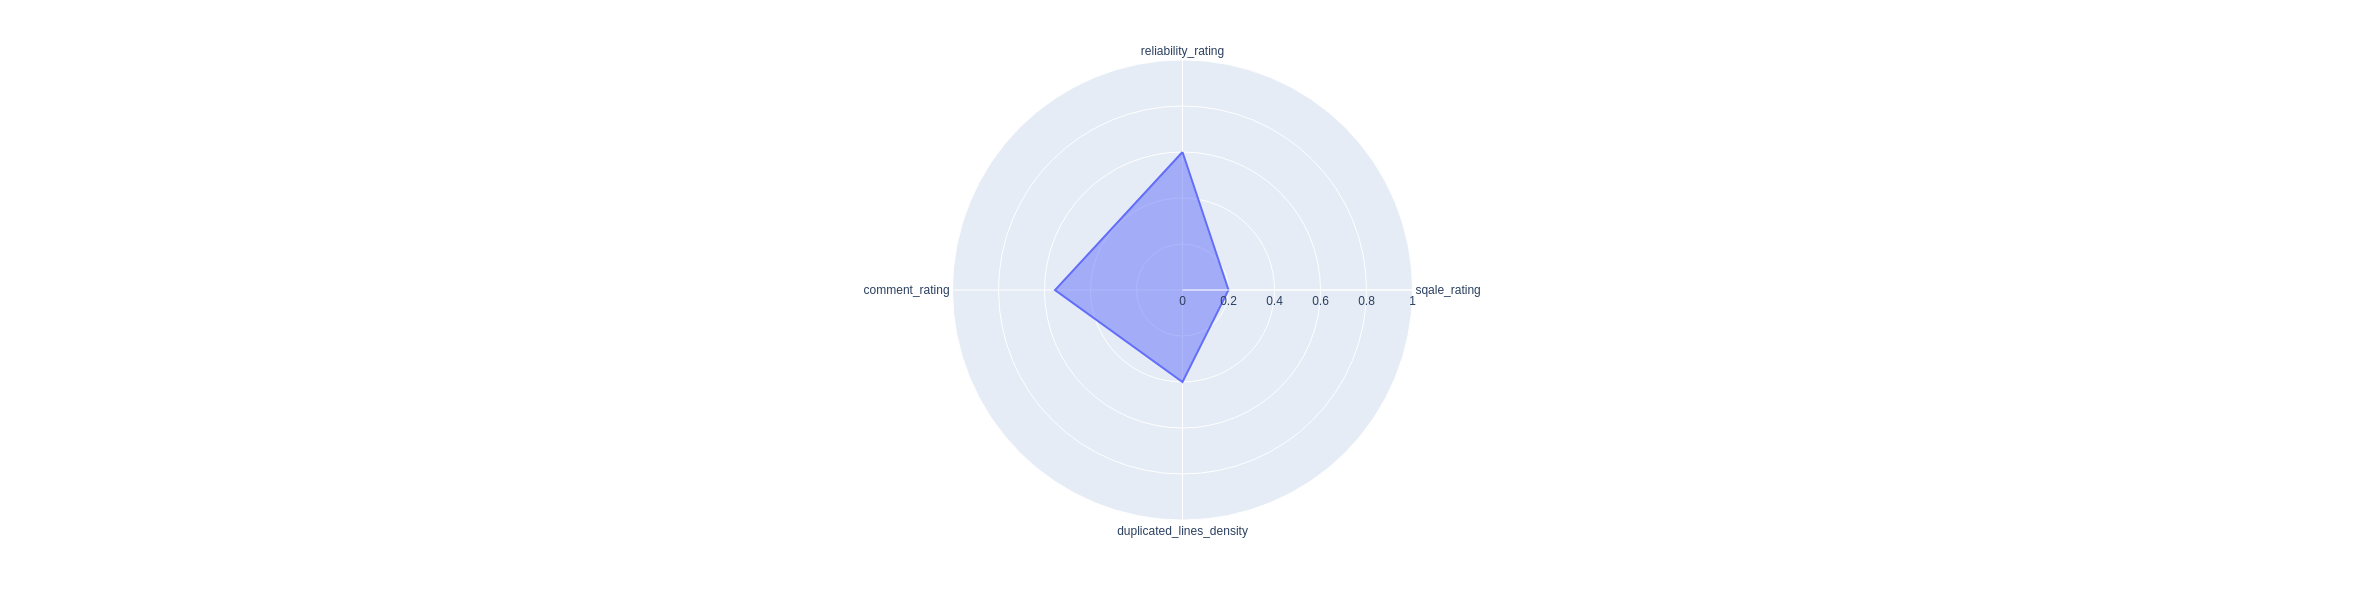

In [49]:

fig = px.line_polar(intersting_features, r='value', theta='metric', line_close=True, range_r = [0,1.0])
fig.update_traces(fill='toself')
fig.update_layout(
    autosize=False,
    width=600,
    height=600,)
fig.show()

/home/rlefeuvr/anaconda3/envs/myenv/lib/python3.10/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



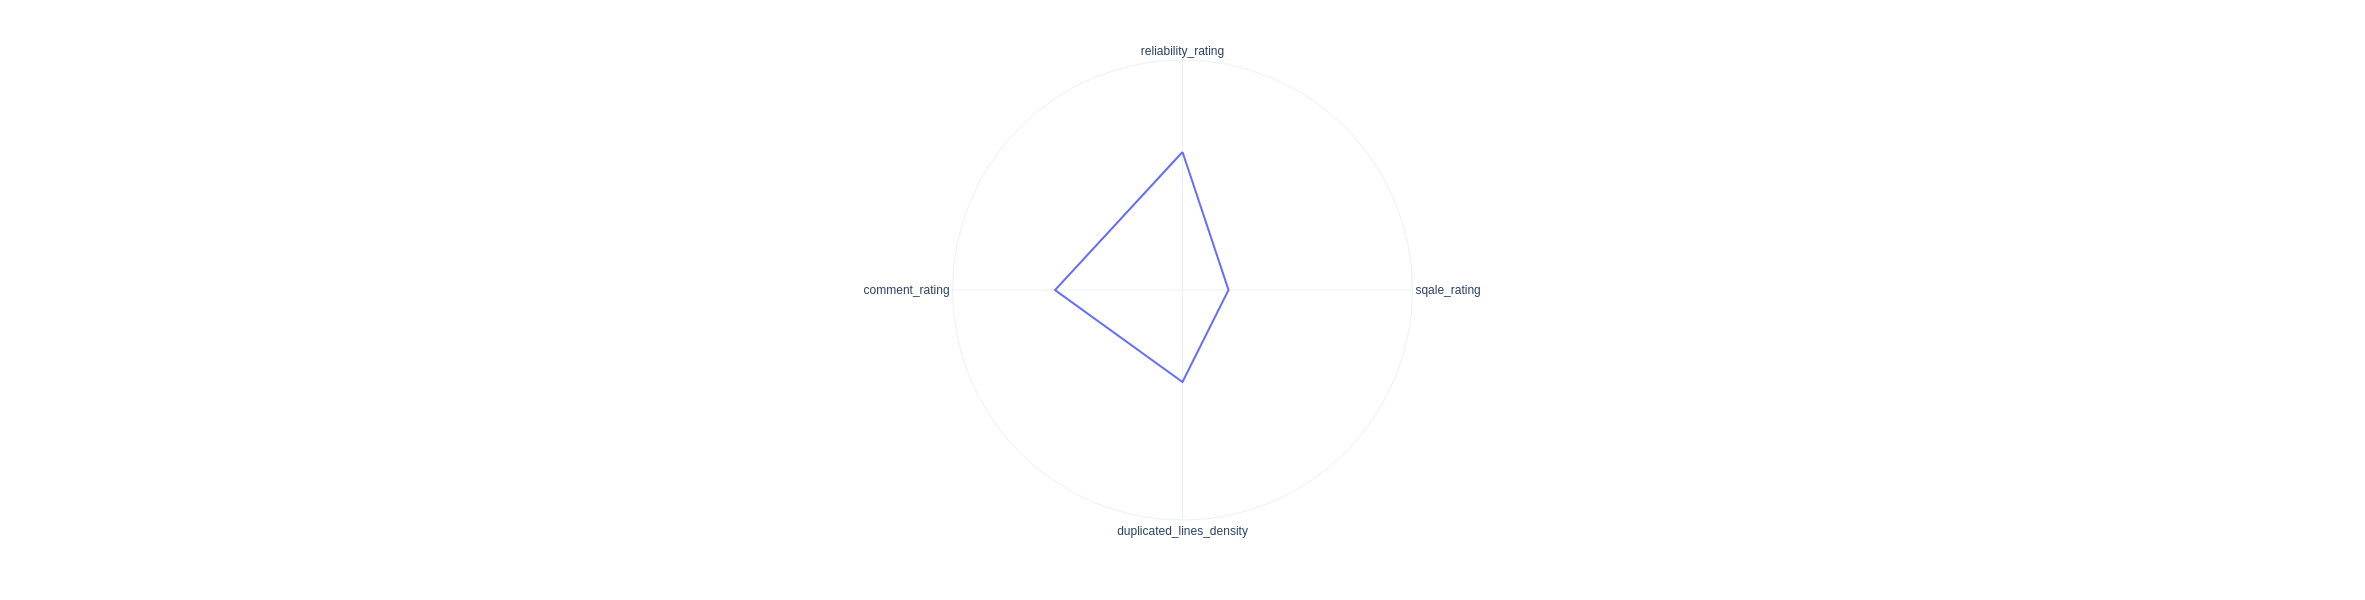

In [39]:
fig = px.line_polar(intersting_features, r='value', theta='metric', line_close=True, range_r = [0,1.0],template="plotly_white")
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      range=[0, 1]
    )),
  showlegend=False,
    autosize=False,
    width=600,
    height=600
)
fig.show()
